In [3266]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input,Activation #Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping #ReduceLROnPlateau
from sqlalchemy import create_engine


In [3268]:
 # Excel dosyasından okuma
sisecamveriset=pd.read_excel("Documents/sisecam/SISE.xlsx")

In [3270]:
sisecamveriset

,Tarih,Saat,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
0,04.01.2010,00:00:00,0.710276,0.730006,0.710276,0.730006,0.719398,57000140,79233070
1,05.01.2010,00:00:00,0.730006,0.739871,0.720141,0.730006,0.733750,40870570,55700940
2,06.01.2010,00:00:00,0.730006,0.730006,0.730006,0.730006,0.731744,17031430,23275110
3,07.01.2010,00:00:00,0.730006,0.749736,0.730006,0.739871,0.739382,50163340,67844990
4,08.01.2010,00:00:00,0.739871,0.749736,0.730006,0.730006,0.734337,24258270,33034240
...,...,...,...,...,...,...,...,...,...
3633,05.07.2024,00:00:00,51.300000,51.900000,51.050000,51.350000,51.424640,1614766000,31400620
3634,08.07.2024,00:00:00,51.400000,51.450000,50.250000,50.350000,50.828510,1865779000,36707340
3635,09.07.2024,00:00:00,50.400000,50.750000,49.720000,49.760000,50.092910,1716545000,34267230
3636,10.07.2024,00:00:00,49.840000,50.200000,49.440000,49.480000,49.810080,2042851000,41012800


In [3158]:
sisecamveriset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Tarih     3638 non-null   object 
 1   Saat      3638 non-null   object 
 2   Açılış    3638 non-null   float64
 3   Yüksek    3638 non-null   float64
 4   Düşük     3638 non-null   float64
 5   Kapanış   3638 non-null   float64
 6   Ortalama  3638 non-null   float64
 7   Hacim     3638 non-null   int64  
 8   Lot       3638 non-null   int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 255.9+ KB


In [3160]:
sisecamveriset.describe()

,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
count,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3.638000e+03,3.638000e+03
mean,8.923222,9.069969,8.782925,8.915015,8.932466,5.497527e+08,3.645416e+07
std,14.108339,14.343135,13.885315,14.084703,14.124144,1.109261e+09,6.046277e+07
min,0.660952,0.670817,0.641222,0.660952,0.658863,7.785560e+05,4.426110e+05
25%,1.548797,1.558662,1.519202,1.548797,1.544842,1.204136e+07,5.843166e+06
50%,3.117324,3.146919,3.082796,3.122256,3.113831,2.428229e+07,1.047404e+07
75%,6.412217,6.518265,6.360426,6.429481,6.451222,4.858734e+08,4.365068e+07
max,56.032910,56.674130,54.898440,55.835610,55.960630,1.244630e+10,8.298628e+08


In [3166]:
sisecamveriset.head()

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
0,733776,0.710276,0.730006,0.710276,0.730006,0.719398,57000140,79233070
1,733777,0.730006,0.739871,0.720141,0.730006,0.733750,40870570,55700940
2,733778,0.730006,0.730006,0.730006,0.730006,0.731744,17031430,23275110
3,733779,0.730006,0.749736,0.730006,0.739871,0.739382,50163340,67844990
4,733780,0.739871,0.749736,0.730006,0.730006,0.734337,24258270,33034240


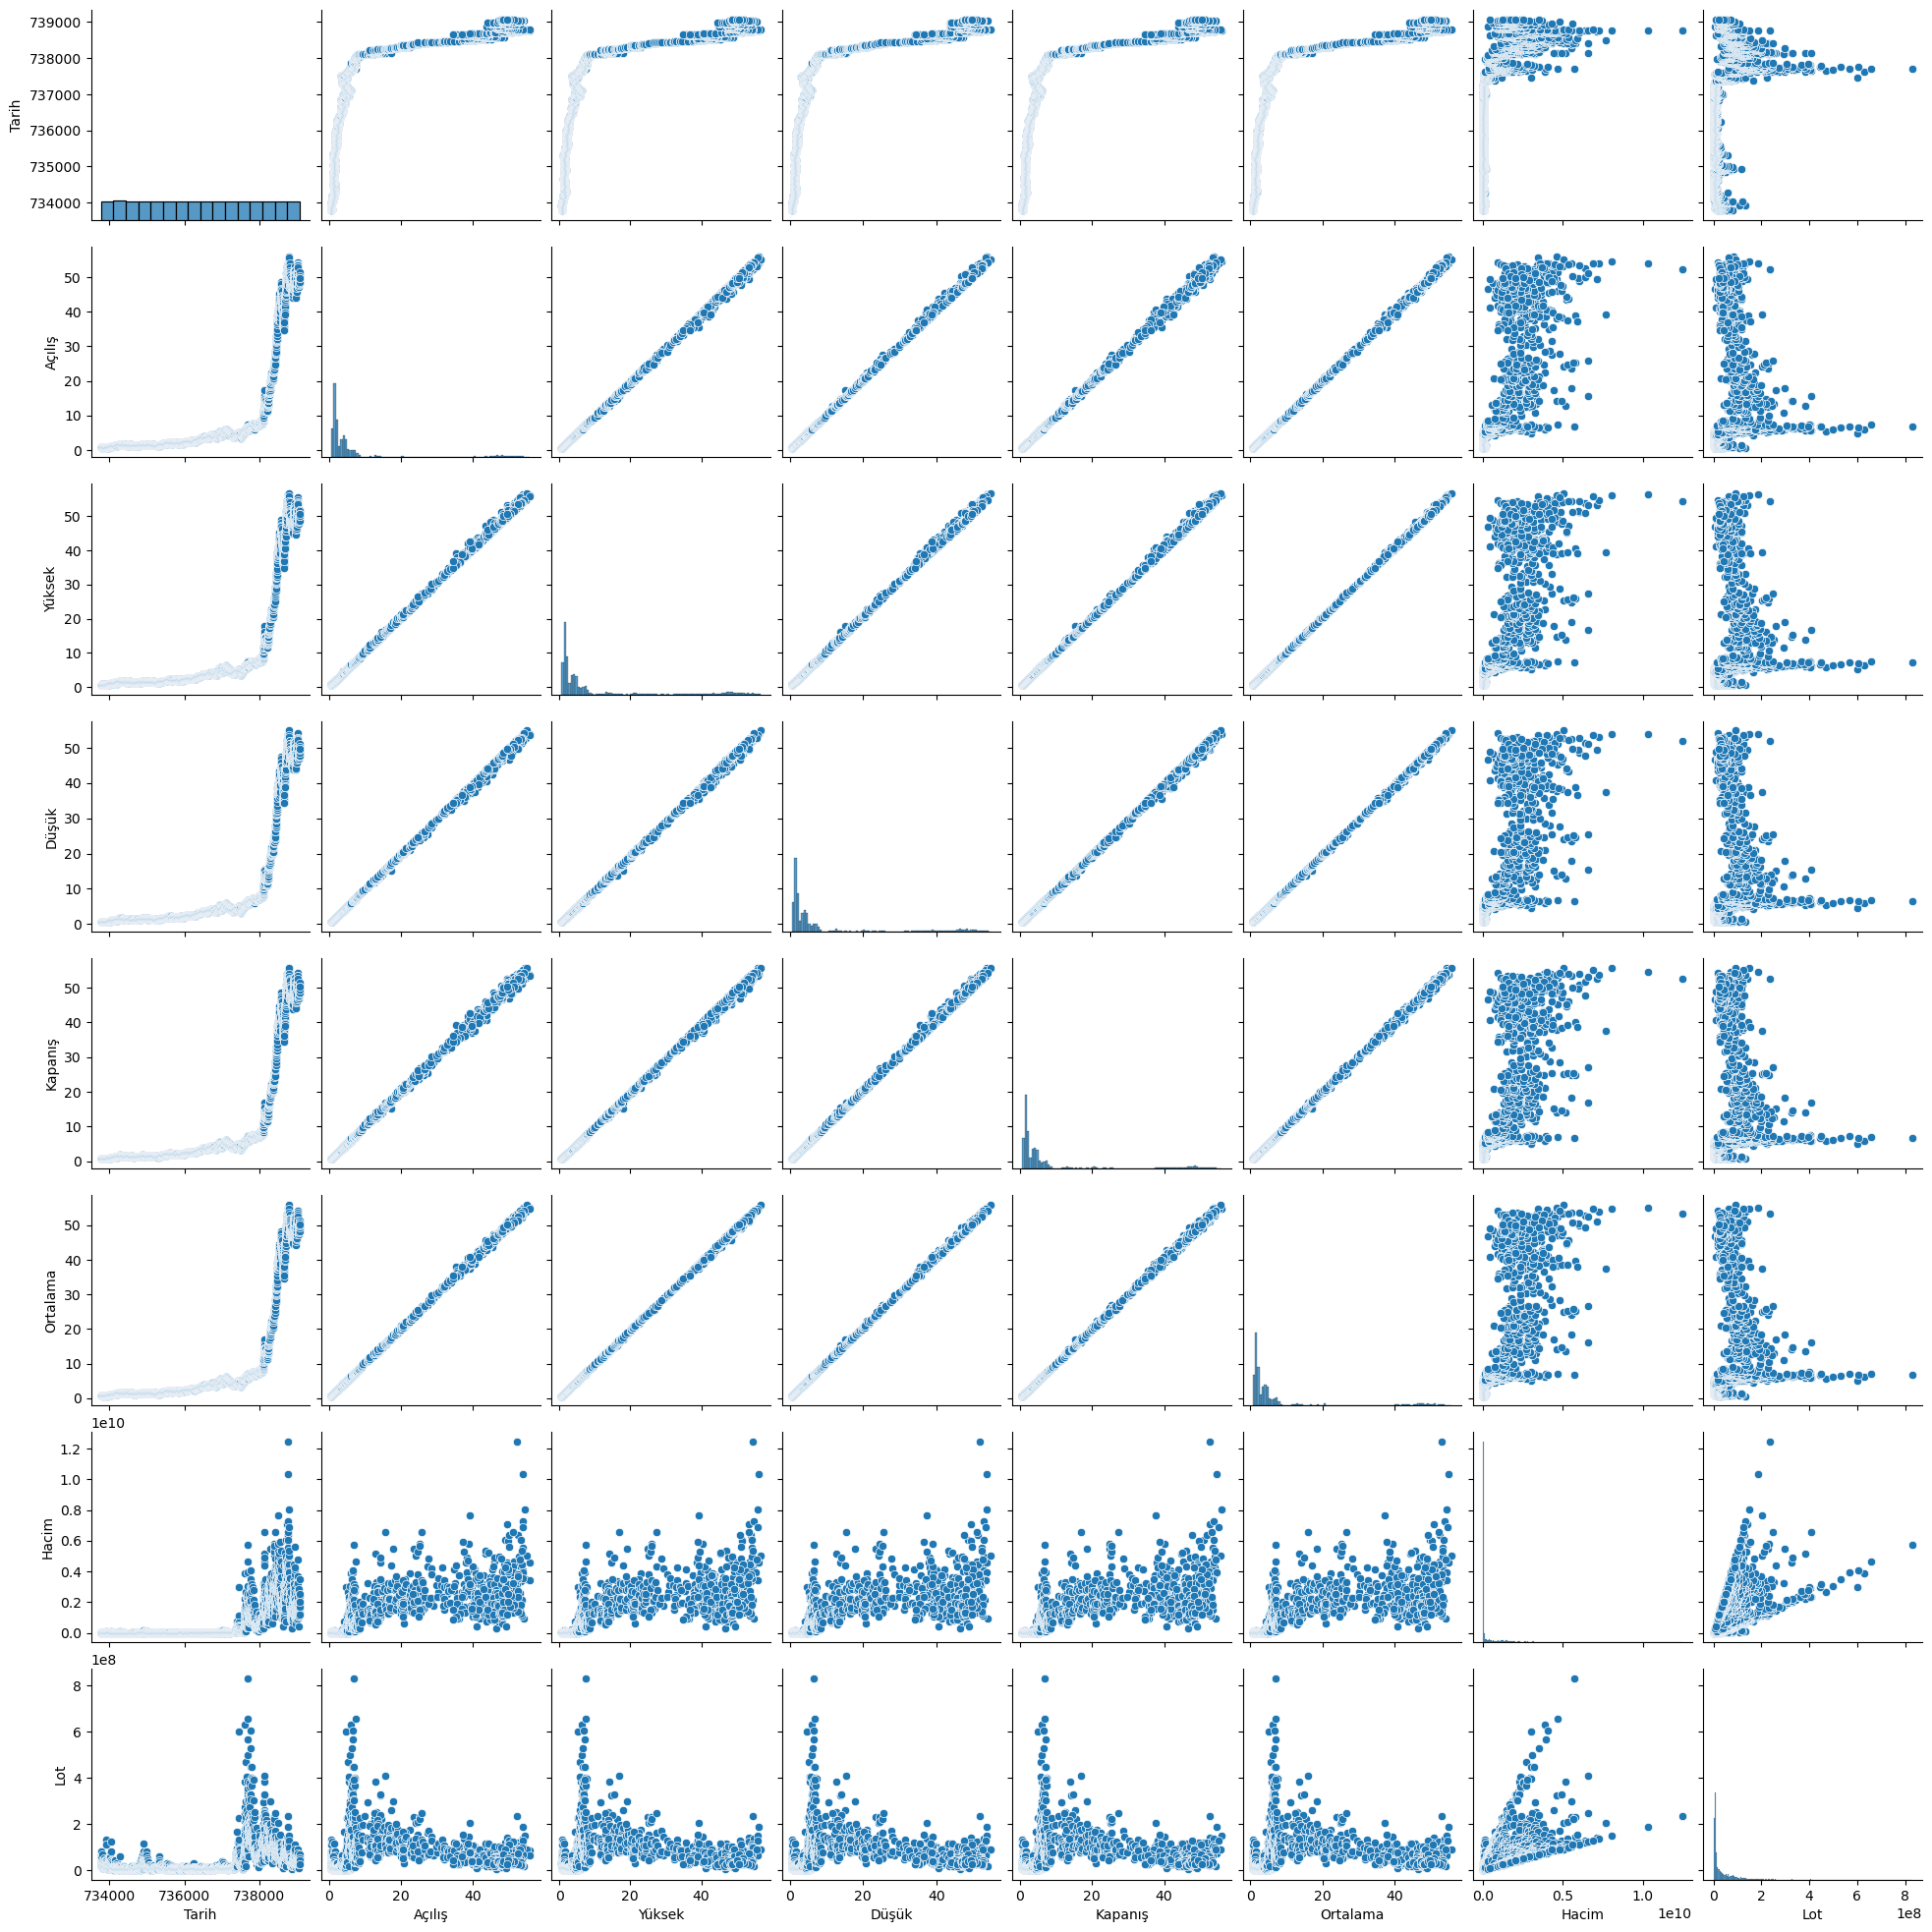

In [3168]:
sbn.pairplot(sisecamveriset)

In [3163]:
# 'Tarih' sütununu datetime formatına çevirme ve ordinal değerlere dönüştürme
sisecamveriset['Tarih'] = pd.to_datetime(sisecamveriset['Tarih'], format='%d.%m.%Y')
sisecamveriset['Tarih'] = sisecamveriset['Tarih'].map(pd.Timestamp.toordinal)
sisecamveriset = sisecamveriset.select_dtypes(include=['float64', 'int64'])

In [3073]:
sisecamveriset

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
0,733776,0.710276,0.730006,0.710276,0.730006,0.719398,57000140,79233070
1,733777,0.730006,0.739871,0.720141,0.730006,0.733750,40870570,55700940
2,733778,0.730006,0.730006,0.730006,0.730006,0.731744,17031430,23275110
3,733779,0.730006,0.749736,0.730006,0.739871,0.739382,50163340,67844990
4,733780,0.739871,0.749736,0.730006,0.730006,0.734337,24258270,33034240
...,...,...,...,...,...,...,...,...
3633,739072,51.300000,51.900000,51.050000,51.350000,51.424640,1614766000,31400620
3634,739075,51.400000,51.450000,50.250000,50.350000,50.828510,1865779000,36707340
3635,739076,50.400000,50.750000,49.720000,49.760000,50.092910,1716545000,34267230
3636,739077,49.840000,50.200000,49.440000,49.480000,49.810080,2042851000,41012800


In [3074]:
#print(sisecamveriset.head())
print(sisecamveriset.index)


RangeIndex(start=0, stop=3638, step=1)


In [3075]:
sisecamveriset.describe()

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot
count,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3638.000000,3.638000e+03,3.638000e+03
mean,736416.095932,8.923222,9.069969,8.782925,8.915015,8.932466,5.497527e+08,3.645416e+07
std,1528.817135,14.108339,14.343135,13.885315,14.084703,14.124144,1.109261e+09,6.046277e+07
min,733776.000000,0.660952,0.670817,0.641222,0.660952,0.658863,7.785560e+05,4.426110e+05
25%,735092.250000,1.548797,1.558662,1.519202,1.548797,1.544842,1.204136e+07,5.843166e+06
50%,736411.500000,3.117324,3.146919,3.082796,3.122256,3.113831,2.428229e+07,1.047404e+07
75%,737739.750000,6.412217,6.518265,6.360426,6.429481,6.451222,4.858734e+08,4.365068e+07
max,739078.000000,56.032910,56.674130,54.898440,55.835610,55.960630,1.244630e+10,8.298628e+08


In [3076]:
sisecamveriset.isnull().sum()  # verilerde boş değer var mı kontrol ediyoruz 

Tarih       0
Açılış      0
Yüksek      0
Düşük       0
Kapanış     0
Ortalama    0
Hacim       0
Lot         0
dtype: int64

In [3077]:
sisecamveriset = sisecamveriset.dropna() # burda yok ama eger olsaydı eksik veri bulunan (NaN) satırları siler

<Axes: xlabel='Kapanış', ylabel='Count'>

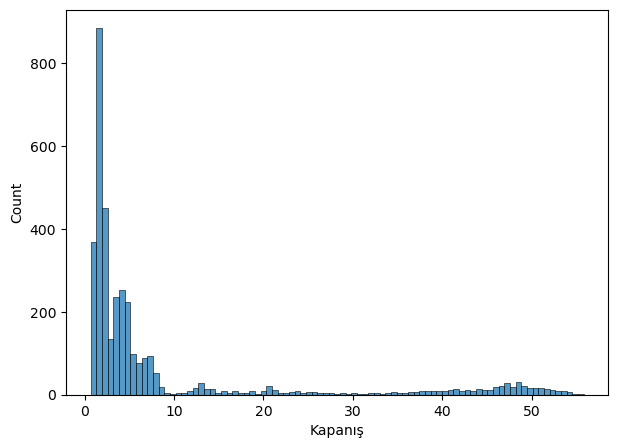

In [3078]:
plt.figure(figsize=(7,5))
sbn.histplot(sisecamveriset["Kapanış"])

In [3079]:
numeric_df = sisecamveriset#.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplamak
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini yazdırmak
print(correlation_matrix)

             Tarih    Açılış    Yüksek     Düşük   Kapanış  Ortalama  \
Tarih     1.000000  0.712576  0.712762  0.712752  0.712975  0.712817   
Açılış    0.712576  1.000000  0.999845  0.999851  0.999614  0.999884   
Yüksek    0.712762  0.999845  1.000000  0.999813  0.999841  0.999957   
Düşük     0.712752  0.999851  0.999813  1.000000  0.999820  0.999934   
Kapanış   0.712975  0.999614  0.999841  0.999820  1.000000  0.999874   
Ortalama  0.712817  0.999884  0.999957  0.999934  0.999874  1.000000   
Hacim     0.636072  0.779353  0.784199  0.778446  0.782548  0.781701   
Lot       0.449985  0.260666  0.264097  0.260273  0.263126  0.262521   

             Hacim       Lot  
Tarih     0.636072  0.449985  
Açılış    0.779353  0.260666  
Yüksek    0.784199  0.264097  
Düşük     0.778446  0.260273  
Kapanış   0.782548  0.263126  
Ortalama  0.781701  0.262521  
Hacim     1.000000  0.644733  
Lot       0.644733  1.000000  


In [3170]:
# Kapanış verilerinin arasındaki farkı hesaplama
#sisecamveriset['Kapanış_Bir_Önceki'] = sisecamveriset['Kapanış'].shift(1)
sisecamveriset['Kapanış_Fark'] = sisecamveriset['Kapanış'].diff().fillna(0)

In [3172]:
numeric_df = sisecamveriset#.select_dtypes(include=['float64', 'int64'])

# Korelasyon matrisini hesaplamak
correlation_matrix = numeric_df.corr()

# Korelasyon matrisini yazdırmak
print(correlation_matrix)

                 Tarih    Açılış    Yüksek     Düşük   Kapanış  Ortalama  \
Tarih         1.000000  0.712576  0.712762  0.712752  0.712975  0.712817   
Açılış        0.712576  1.000000  0.999845  0.999851  0.999614  0.999884   
Yüksek        0.712762  0.999845  1.000000  0.999813  0.999841  0.999957   
Düşük         0.712752  0.999851  0.999813  1.000000  0.999820  0.999934   
Kapanış       0.712975  0.999614  0.999841  0.999820  1.000000  0.999874   
Ortalama      0.712817  0.999884  0.999957  0.999934  0.999874  1.000000   
Hacim         0.636072  0.779353  0.784199  0.778446  0.782548  0.781701   
Lot           0.449985  0.260666  0.264097  0.260273  0.263126  0.262521   
Kapanış_Fark  0.038001  0.027805  0.040282  0.039063  0.053535  0.039957   

                 Hacim       Lot  Kapanış_Fark  
Tarih         0.636072  0.449985      0.038001  
Açılış        0.779353  0.260666      0.027805  
Yüksek        0.784199  0.264097      0.040282  
Düşük         0.778446  0.260273      0.039

<Axes: >

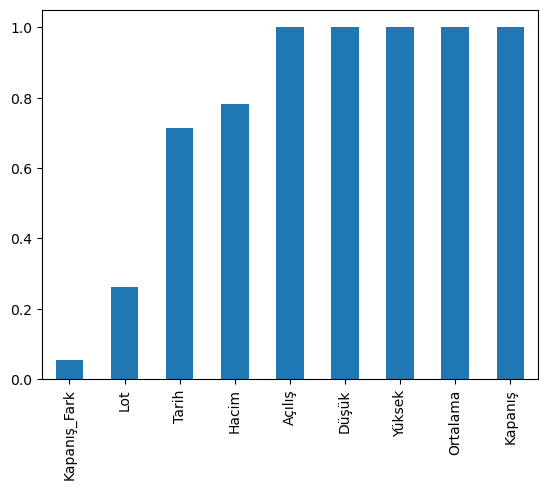

In [2951]:
numeric_df.corr()["Kapanış"].sort_values().plot(kind="bar")

In [2953]:
numeric_df.corr()["Kapanış"].sort_values()

Kapanış_Fark    0.053535
Lot             0.263126
Tarih           0.712975
Hacim           0.782548
Açılış          0.999614
Düşük           0.999820
Yüksek          0.999841
Ortalama        0.999874
Kapanış         1.000000
Name: Kapanış, dtype: float64

<Axes: >

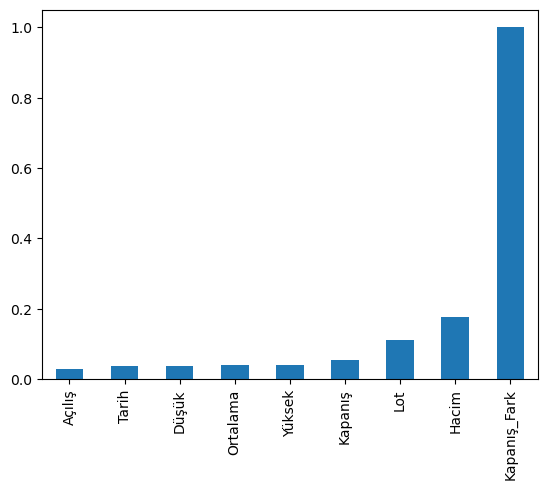

In [2955]:
numeric_df.corr()["Kapanış_Fark"].sort_values().plot(kind="bar")

In [2957]:
numeric_df.corr()["Kapanış_Fark"].sort_values()

Açılış          0.027805
Tarih           0.038001
Düşük           0.039063
Ortalama        0.039957
Yüksek          0.040282
Kapanış         0.053535
Lot             0.112848
Hacim           0.175666
Kapanış_Fark    1.000000
Name: Kapanış_Fark, dtype: float64

In [2959]:
# Özellikler ve hedef değişken
bagimsizdegiskenler = ['Tarih', 'Açılış' ,'Yüksek', 'Düşük', 'Ortalama', 'Hacim', 'Lot','Kapanış_Fark']# bu modelin ogrenmesi icin kullanılacak bagimsiz degiskenler
hedef = 'Kapanış'# hedef degiskeni, bu modelin tahmin etmeye calisacagi deger

x = sisecamveriset[bagimsizdegiskenler].values
y = sisecamveriset[hedef].values

# Eğitim ve test setlerine ayırma
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=10)

In [2961]:
# degiskenlerin ve test lerin sayısını kontrol etme, verilerin %33 ü testlere gitti
print(f"x_train shape: {x_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (2437, 8)
x_test shape: (1201, 8)
y_train shape: (2437,)
y_test shape: (1201,)


In [2963]:
# MinMaxScaler kullanarak verileri 0-1 arasında ölçeklendirme
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [2965]:
x_train

array([[4.86511979e-01, 4.20518460e-02, 4.12189629e-02, ...,
        1.01016935e-03, 4.79768807e-03, 4.59458836e-01],
       [1.24504810e-02, 3.62515898e-04, 5.28449089e-04, ...,
        4.60654627e-04, 1.15728938e-02, 4.56613867e-01],
       [2.55612149e-01, 1.68569920e-02, 1.65580471e-02, ...,
        4.87811127e-04, 4.83216735e-03, 4.52346414e-01],
       ...,
       [1.43369176e-01, 1.68569920e-02, 1.65580471e-02, ...,
        6.05962181e-04, 5.97675474e-03, 4.52346414e-01],
       [8.77004339e-01, 4.61663919e-01, 4.55874517e-01, ...,
        1.29051032e-01, 7.38001731e-02, 4.67993742e-01],
       [3.52952273e-01, 2.77324689e-02, 2.74793116e-02, ...,
        3.84661441e-04, 2.52925488e-03, 4.62303805e-01]])

In [2967]:
# Verilerin korelasyonunu kontrol etme
sisecamveriset_corr = sisecamveriset[bagimsizdegiskenler + [hedef]].corr()
print("Korelasyon Matris:")
print(sisecamveriset_corr)

Korelasyon Matris:
                 Tarih    Açılış    Yüksek     Düşük  Ortalama     Hacim  \
Tarih         1.000000  0.712576  0.712762  0.712752  0.712817  0.636072   
Açılış        0.712576  1.000000  0.999845  0.999851  0.999884  0.779353   
Yüksek        0.712762  0.999845  1.000000  0.999813  0.999957  0.784199   
Düşük         0.712752  0.999851  0.999813  1.000000  0.999934  0.778446   
Ortalama      0.712817  0.999884  0.999957  0.999934  1.000000  0.781701   
Hacim         0.636072  0.779353  0.784199  0.778446  0.781701  1.000000   
Lot           0.449985  0.260666  0.264097  0.260273  0.262521  0.644733   
Kapanış_Fark  0.038001  0.027805  0.040282  0.039063  0.039957  0.175666   
Kapanış       0.712975  0.999614  0.999841  0.999820  0.999874  0.782548   

                   Lot  Kapanış_Fark   Kapanış  
Tarih         0.449985      0.038001  0.712975  
Açılış        0.260666      0.027805  0.999614  
Yüksek        0.264097      0.040282  0.999841  
Düşük         0.260273  

In [2969]:
x_train.shape
##history=model.fit(x=x_train, y=y_train, epochs=290,validation_data=(x_test,y_test),callbacks=[ early_stopping])
#history = model.fit(x_train, y_train, epochs=500, batch_size=250,validation_data=(x_test,y_test), validation_split=0.2,verbose=1)

(2437, 8)

In [3199]:
# TensorFlow ile bir model oluşturma
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(8, activation='relu'),
    #Dropout(0.3),
    Dense(4, activation='relu'),
    #Dropout(0.2),
    Dense(4, activation='relu'),
    #Dropout(0.3),
    #Dense(7, activation='relu'),
    Dense(1)
])

In [3201]:
model.compile(optimizer='adam', loss='mse')
#model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')
#lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=15, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss',mode="min",verbose=1, patience=25)

In [3203]:
# Modeli eğitim verileri ile eğitme
##history=model.fit(x=x_train, y=y_train, epochs=290,validation_data=(x_test,y_test),callbacks=[ early_stopping])
#history = model.fit(x_train, y_train, epochs=500, batch_size=250,validation_data=(x_test,y_test), validation_split=0.2,verbose=1)
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=200,validation_split=0.2,verbose=1,callbacks=[ early_stopping])

Epoch 1/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 278.7162 - val_loss: 266.0964
Epoch 2/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 567us/step - loss: 248.9664 - val_loss: 202.9415
Epoch 3/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 510us/step - loss: 175.2658 - val_loss: 137.5781
Epoch 4/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 520us/step - loss: 130.0284 - val_loss: 94.0124
Epoch 5/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 508us/step - loss: 85.6512 - val_loss: 50.8519
Epoch 6/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 519us/step - loss: 39.6840 - val_loss: 17.7619
Epoch 7/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 12.1514 - val_loss: 4.7129
Epoch 8/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 533us/step - loss: 2.8957 - val_loss: 0.9698
Epoch 9/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 542us/step - loss: 0.8562 - val_loss: 0.6154
Epoch 10/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 515us/step - loss: 0.6026 - val_loss: 0.4892
Epoch 11/200
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 523us/step - loss: 0.4405 - val_loss: 0.4260
Epoch 12/200
77/77 ━━━━

In [3205]:
#loss verileri için bir dataframe oluşturuldu
kayipVerisi=pd.DataFrame(history.history)

In [3207]:
kayipVerisi.head()

,loss,val_loss
0,270.935486,266.096375
1,229.372131,202.941544
2,162.816437,137.578110
3,112.024071,94.012390
4,70.164978,50.851929


<Axes: >

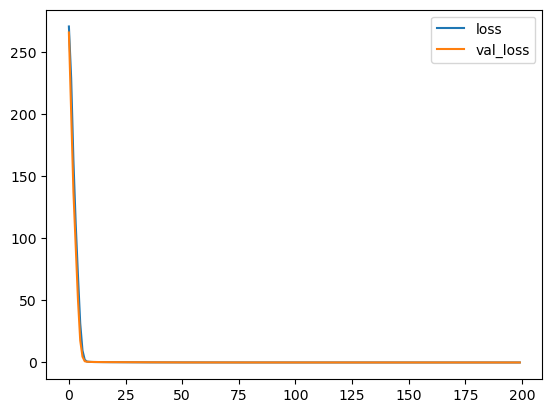

In [3209]:
kayipVerisi.plot()

In [3211]:
tahminDizisi = model.predict(x_test)

38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 822us/step


In [3213]:
tahminDizisi 

array([[ 5.402329  ],
       [ 0.78521687],
       [ 3.4965749 ],
       ...,
       [ 2.012015  ],
       [ 3.535662  ],
       [43.084187  ]], dtype=float32)

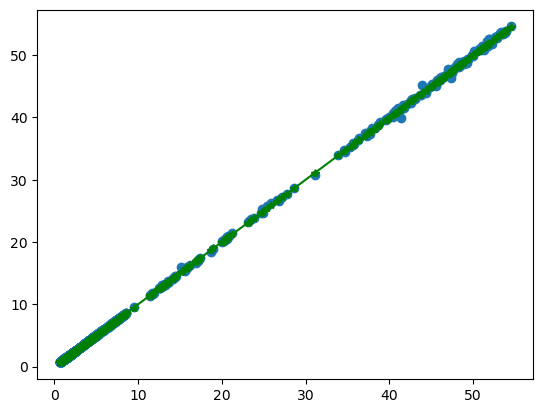

In [3217]:
plt.scatter(y_test,tahminDizisi)
plt.plot(y_test,y_test,"g-*")

In [3219]:
sisecamveriset.iloc[2]

Tarih           7.337780e+05
Açılış          7.300062e-01
Yüksek          7.300062e-01
Düşük           7.300062e-01
Kapanış         7.300062e-01
Ortalama        7.317443e-01
Hacim           1.703143e+07
Lot             2.327511e+07
Kapanış_Fark    0.000000e+00
Name: 2, dtype: float64

In [3221]:
sisecamveriset

,Tarih,Açılış,Yüksek,Düşük,Kapanış,Ortalama,Hacim,Lot,Kapanış_Fark
0,733776,0.710276,0.730006,0.710276,0.730006,0.719398,57000140,79233070,0.000000
1,733777,0.730006,0.739871,0.720141,0.730006,0.733750,40870570,55700940,0.000000
2,733778,0.730006,0.730006,0.730006,0.730006,0.731744,17031430,23275110,0.000000
3,733779,0.730006,0.749736,0.730006,0.739871,0.739382,50163340,67844990,0.009865
4,733780,0.739871,0.749736,0.730006,0.730006,0.734337,24258270,33034240,-0.009865
...,...,...,...,...,...,...,...,...,...
3633,739072,51.300000,51.900000,51.050000,51.350000,51.424640,1614766000,31400620,0.050000
3634,739075,51.400000,51.450000,50.250000,50.350000,50.828510,1865779000,36707340,-1.000000
3635,739076,50.400000,50.750000,49.720000,49.760000,50.092910,1716545000,34267230,-0.590000
3636,739077,49.840000,50.200000,49.440000,49.480000,49.810080,2042851000,41012800,-0.280000


In [3223]:
sisecamveriset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3638 entries, 0 to 3637
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Tarih         3638 non-null   int64  
 1   Açılış        3638 non-null   float64
 2   Yüksek        3638 non-null   float64
 3   Düşük         3638 non-null   float64
 4   Kapanış       3638 non-null   float64
 5   Ortalama      3638 non-null   float64
 6   Hacim         3638 non-null   int64  
 7   Lot           3638 non-null   int64  
 8   Kapanış_Fark  3638 non-null   float64
dtypes: float64(6), int64(3)
memory usage: 255.9 KB


In [3225]:
print(type(sisecamveriset))

<class 'pandas.core.frame.DataFrame'>


In [3227]:
yenidropsisecam=sisecamveriset.drop("Kapanış",axis=1).iloc[2]

In [3229]:
yenidropsisecam

Tarih           7.337780e+05
Açılış          7.300062e-01
Yüksek          7.300062e-01
Düşük           7.300062e-01
Ortalama        7.317443e-01
Hacim           1.703143e+07
Lot             2.327511e+07
Kapanış_Fark    0.000000e+00
Name: 2, dtype: float64

In [3231]:
print(yenidropsisecam.shape),

(8,)


(None,)

In [3260]:
#Model performansını değerlendirmek için kullanılan ortalama mutlak hata
mae=mean_absolute_error(y_test,tahminDizisi)
print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 0.057738276785803636


In [3262]:
# Model performansını değerlendirmek için kullanılan ortalama kareler hatası
mse = mean_squared_error(y_test, tahminDizisi)
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 0.014397252157931938


In [3264]:
# Tahmin sonuçlarını ve gerçek değerleri karşılaştırma
results = pd.DataFrame({'Gerçek': y_test, 'Tahmin': tahminDizisi.flatten()})
print(results)#.head())

         Gerçek     Tahmin
0      5.376397   5.402329
1      0.680682   0.785217
2      3.482327   3.496575
3      4.597066   4.619401
4      1.450148   1.430459
...         ...        ...
1196   0.887845   0.901160
1197   2.436642   2.435745
1198   2.032179   2.012015
1199   3.511922   3.535662
1200  43.109830  43.084187

[1201 rows x 2 columns]


In [3237]:
# MySQL veritabanı bağlantı dizesi
username = 'root'
password = '*****'
host = '******'
database = 'seda_nilsu_veri_analizi'

In [3239]:
# MySQL engine oluşturma
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}/{database}')

In [3241]:
try:
    # Veritabanına bağlanın ve DataFrame'i SQL tablosuna yazın
    with engine.connect() as connection:
        # DataFrame'i SQL tablosuna yazma
        sisecamveriset.to_sql('sisecamanaliz', con=connection, if_exists='replace', index=False)
        print("Veriler başarıyla tabloya aktarıldı.")

        # Verilerin başarıyla aktarıldığını doğrulama
        verification_query = "SELECT COUNT(*) FROM sisecamanaliz;"
        result = connection.execute(verification_query)
        count = result.scalar()

        if count > 0:
            print(f"Tablo 'sisecamanaliz' içinde {count} veri var.")
        else:
            print("Tablo 'sisecamanaliz' içinde veri bulunamadı.")
        
except Exception as e:
    print(f"Bir hata oluştu: {e}")

Veriler başarıyla tabloya aktarıldı.
Bir hata oluştu: Not an executable object: 'SELECT COUNT(*) FROM sisecamanaliz;'


In [3242]:
with engine.connect() as connection:
   kayipVerisi.to_sql('sisecamkayıpverisi', con=connection, if_exists='replace', index=False)
   print("Veriler başarıyla tabloya aktarıldı.")

Veriler başarıyla tabloya aktarıldı.


In [3243]:
print(type(results))

<class 'pandas.core.frame.DataFrame'>


In [3244]:
with engine.connect() as connection:
   results.to_sql('sisecamsonuçlar', con=connection, if_exists='replace', index=False)
   print("Veriler başarıyla tabloya aktarıldı.")

Veriler başarıyla tabloya aktarıldı.
